# COMP47700 Speech and Audio PL2: Audio Processing in Python


## Learning Outcomes
The aim of this tutorial is to build on the basic audio processing in Python from lab sheet 1 and to continue to familiarise yourself with the libraries and concepts introduced in the lectures.

This practical tutorial covers the following learning outcomes within the COMP47700 Speech and Audio module:
* Analyse speech and audio signals and features **[LO1]**
  * Develop the ability to handle audio data in Python, including importing, manipulating, and managing various audio formats

* Create programmes to conduct experiments on speech and audio samples building on third-party software libraries **[LO6]**
  * Attain proficiency in generating sound in Python, exploring techniques and tools to create custom audio signals for diverse applications.
  * Master the visualization of audio data in different domains, including time (Waveform), frequency (Spectrum), and time-frequency (Spectrogram/STFT), utilizing Python tools like librosa, scipy, and numpy for effective frequency domain visualization.


## Module Topics
* Basic audio processing (Unit 2, Unit 3)

## Why Is It Important?
Mastering fundamental audio processing techniques is essential for seamlessly grasping advanced concepts covered later in this module. Whenever you manipulate or generate audio, visualization and normalization in both the time and frequency domains become indispensable. Processing audio using libraries like librosa or scipy is imperative. Proficiency in these fundamental concepts in Python is critical for effectively addressing advanced audio topics such as audio quality, degradation, machine learning pipelines, and is essential for success in the module project.

## Structure of this tutorial
This practical tutorial contains different sections:
* **Live coding:** Basic theory, demos and coding examples presented by the lecturer on site (unmarked)
* **Student activity:** Familiarisation and coding exercises to be completed by the students and followed by a short discussion on site (unmarked). These activities introduce key concepts and skills necessary to complete the assignments.
* **Assignment:** Three (3) take home problem/coding questions to be completed by the students and due in two (2) weeks from the day the practical tutorial is given. Assignment questions represent fifteen (15) mark points.

>[COMP47700 Speech and Audio PL2: Audio Processing in Python](#scrollTo=oIY9p4hcjGr4)

>>[Learning Outcomes](#scrollTo=IvNfIDiAInTf)

>>[Module Topics](#scrollTo=IvNfIDiAInTf)

>>[Why Is It Important?](#scrollTo=IvNfIDiAInTf)

>>[Structure of this tutorial](#scrollTo=IvNfIDiAInTf)

>[DTMF frequency grid](#scrollTo=eh_V8MseInTi)

>>[Live Coding: Sine wave generation](#scrollTo=xL9BQTMeInTk)

>>[Student Activity: Sine wave generation and mixing](#scrollTo=UmJ1wBuGInTl)

>>[Live Coding: Fast Fourier Transform (FFT)](#scrollTo=jG33XS82InTn)

>>[Student Activity: Mystery DTMF Number](#scrollTo=q2S-0PB-InTo)

>[Assignment](#scrollTo=agC5K-cDInTq)

>>>[Question 1](#scrollTo=vnH6AR45rQnG)

>>>[Question 2](#scrollTo=V45Wxc-0qfKi)

>>>[Question 3](#scrollTo=Tg7HnV2Lo3JR)



# DTMF frequency grid

[Dual-tone multi-frequency signaling (DTMF)](https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling) was used to send information signals over the voice frequency bands on a telephone system. This means that both voice and dual tones are sent over the same channel.
While it is no longer in general use, you still hear it for some automatic information systems (e.g. telephone banking or service centres). These simple signals are interesting for introducing audio processing concepts.

The 4x4 matrix shows the frequencies to combine to create the sound for each key, e.g. to create the tone for a 4, a 770 Hz tone is combined with a 1209 Hz tone.

|        | 1209 Hz | 1336 Hz | 1477 Hz | 1633 Hz |
|--------|---------|---------|---------|---------|
| 697 Hz | 1       | 2       | 3       | A       |
| 770 Hz | 4       | 5       | 6       | B       |
| 852 Hz | 7       | 8       | 9       | C       |
| 941 Hz | *       | 0       | #       | D       |

Sine wave signals were used in the number dialling on touch-tone phones. They use a dual-tone multi-frequency DTMF system to encode the number dialled for transmission across the telephone network as an auditory signal. DTMF is also used in automated telephone service menu systems.


Each key-press on the telephone keypad generates the sum of two tones expressed as

\begin{equation}
x(n)=cos(2\pi f_{1} nT) + cos(2\pi f_{2} nT)
\end{equation}

where $T$ is the sampling period  and the two frequencies $f_{1}$ and $f_{2}$ combine together to give a unique encoding for each digit on the keypad. The frequencies used are shown in the table above.


### Downloading and extracting lab zip file from Github

In [7]:
# Download the zip file
!wget https://github.com/COMP47700-Speech-and-Audio/PL2-Audio-Processing-in-Python/raw/main/PL2_files.zip

--2025-02-20 12:37:13--  https://github.com/COMP47700-Speech-and-Audio/PL2-Audio-Processing-in-Python/raw/main/PL2_files.zip
Resolving github.com (github.com)... 4.208.26.197
Connecting to github.com (github.com)|4.208.26.197|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/COMP47700-Speech-and-Audio/PL2-Audio-Processing-in-Python/main/PL2_files.zip [following]
--2025-02-20 12:37:13--  https://raw.githubusercontent.com/COMP47700-Speech-and-Audio/PL2-Audio-Processing-in-Python/main/PL2_files.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5426604 (5.2M) [application/zip]
Saving to: ‘PL2_files.zip.1’

PL2_files.zip.1     100%[===================>]   5.17M  11.6MB/s    in 0.4s    

2025-02-20 1

In [8]:
import zipfile

zipname = 'PL2_files.zip'
# Extract the zip file
with zipfile.ZipFile(zipname, 'r') as zip_ref:
    zip_ref.extractall()  # Extract all files to the current directory

In [9]:
#Imports and Magic
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import urllib.request as urllib2
import soundfile as sf
from statistics import mode

%matplotlib inline

## **Live Coding**: Sine wave generation

1. With a sampling frequency of 16 kHz, create a sin wave with a 770 Hz frequency and 0.25 amplitude.
2. Plot the 0.02 seconds of the wave and play it.

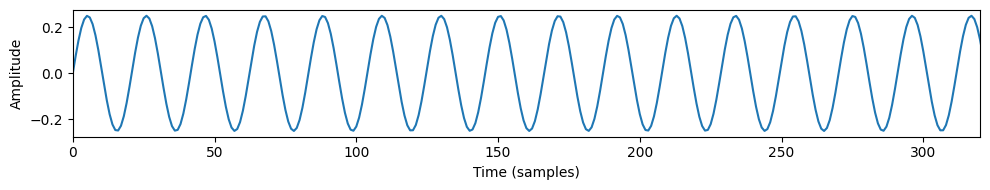

In [10]:
# Sampling frequency
sr = 16000

# Amplitude
A = 0.25

# Frequencey
f = 770

# Duration of signal in seconds
T = 1

# Time Samples
t = np.arange(0, T, 1/sr)

# Creating the sine wave
s1 = A * np.sin(2 * np.pi * f * t)

# Plot the signal
plt.figure(figsize = (10, 2))
plt.plot(s1)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Play the signal
ipd.Audio(s1, rate = sr)
# print(s1.size)

## **Student Activity**: Sine wave generation and mixing
1. Create a second signal but this time with a frequency of 1209 Hz.
2. Add it to your first signal and plot and play the 3 waves: sine wave 770 Hz, sine wave 1209 Hz, and the sum.

**Question:** What number have you generated?

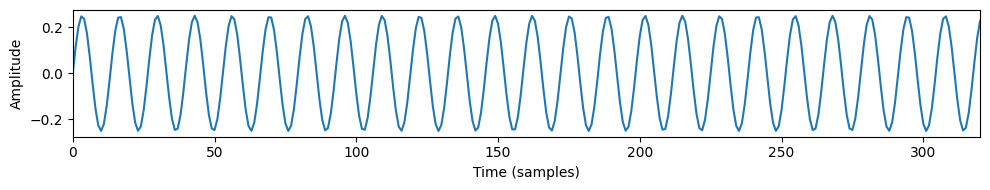

In [11]:
# Sampling frequency
sr = 16000

# Amplitude
A = 0.25

# Frequencey
f = 1209

# Duration of signal in seconds
T = 1

# Time Samples
t = np.arange(0, T, 1/sr)

# Creating the sine wave
s2 = A * np.sin(2 * np.pi * f * t)

# Plot the signal
plt.figure(figsize = (10, 2))
plt.plot(s2)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Play the signal
ipd.Audio(s2, rate = sr)
# print(s1.size)

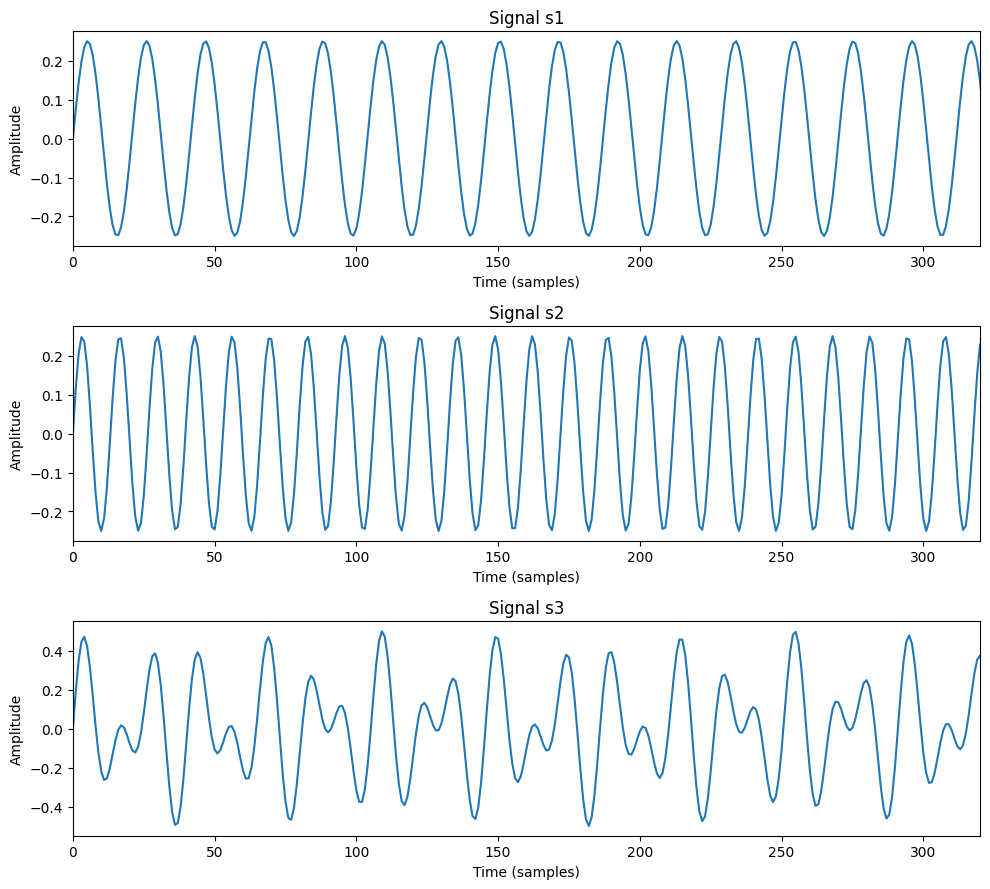

In [12]:
# Creating the sine wave
s3 = s1 + s2

# Create figure and axes
fig, ax = plt.subplots(3, 1, figsize=(10, 9))

# Plot s1
ax[0].plot(s1)
ax[0].set_xlim([0, 0.02 * sr])
ax[0].set_xlabel('Time (samples)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Signal s1')

# Plot s2
ax[1].plot(s2)
ax[1].set_xlim([0, 0.02 * sr])
ax[1].set_xlabel('Time (samples)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Signal s2')

# Plot s3
ax[2].plot(s3)
ax[2].set_xlim([0, 0.02 * sr])
ax[2].set_xlabel('Time (samples)')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('Signal s3')

plt.tight_layout()
plt.show()

# Play the signals
# ipd.Audio(s1, rate=sr)
# ipd.Audio(s2, rate=sr)
ipd.Audio(s3, rate=sr)

## **Live Coding**: Fast Fourier Transform (FFT)

Computing a FFT to look at the signal in the frequency domain and see what tones are in the signal.

There are lots of ways of doing this, e.g.: `numpy.fft.rfft`, `scipy.fftpack.fftfreq`, `librosa.piptrack`


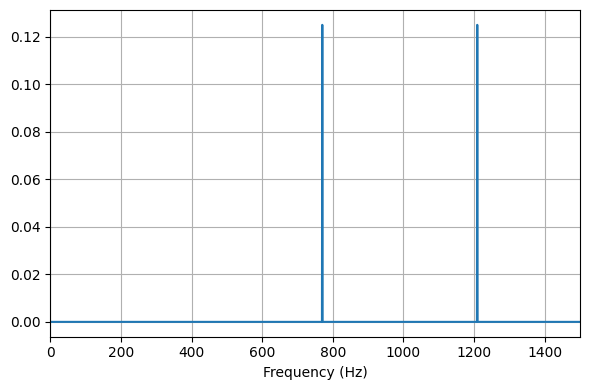

In [13]:
from scipy import fftpack

# Sampling Frequency
sr = 16000

# DFT length
N = len(t)

# Compute DFT using FFT
X = fftpack.fft(s3, n=N)

sampling_frequencies = fftpack.fftfreq(N, d=1/sr)

# Plot the DFT
plt.figure(figsize = (6, 4))
plt.plot(sampling_frequencies[:N//2], np.abs(X)[:N//2]/N)
plt.xlim(0, 1500)
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

(array([32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 32.]),
 array([ 769.73821318,  813.70330761,  857.66840204,  901.63349647,
         945.59859089,  989.56368532, 1033.52877975, 1077.49387418,
        1121.4589686 , 1165.42406303, 1209.38915746]),
 <BarContainer object of 10 artists>)

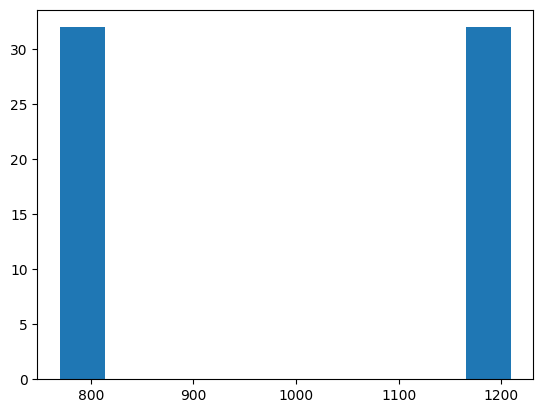

In [14]:
frequencies, _ = librosa.piptrack(y=s3, sr=16000)

freqs = frequencies[frequencies > 0].flatten()

plt.hist(freqs)

## **Student Activity**: Mystery DTMF Number

Utilise the audio processing libraries previously covered to analyze and decode the DTMF number from the provided audio file. Accomplish this by generating and examining its spectrogram.


In [15]:
f_dtmf = "./PL2_files/dtmfnumbers.wav"

# Play DTMF signal
ipd.Audio(filename = f_dtmf) # load a local WAV file

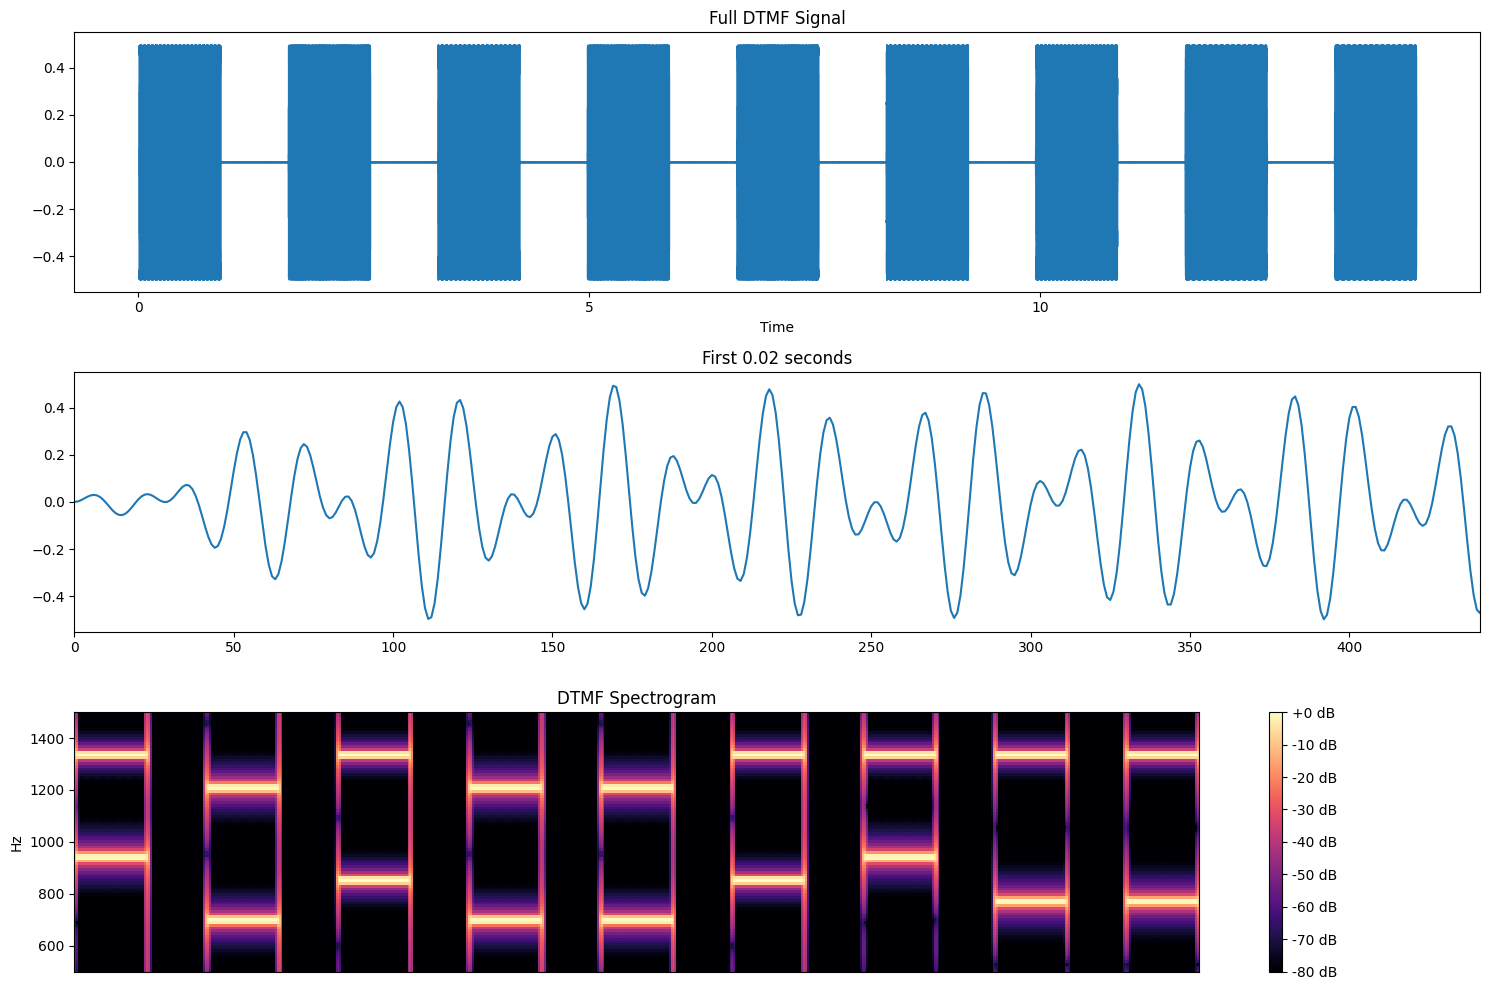

In [16]:
y_dtmf, sr = librosa.load(f_dtmf)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
librosa.display.waveshow(y_dtmf, sr=sr)
plt.title('Full DTMF Signal')

plt.subplot(3, 1, 2)
plt.plot(y_dtmf)
plt.xlim([0, 0.02*sr])
plt.title('First 0.02 seconds')

plt.subplot(3, 1, 3)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_dtmf, n_fft=2048)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.ylim(500, 1500)
plt.title('DTMF Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.title('DTMF Spectrogram')
plt.tight_layout()

plt.show()

# **Assignment**

Submit a notebook via brightspace demoing how to:

### **Question 1**
Create a function that takes a phone number as a string input, and generates a DTMF signal representing that phone number. Save the generated DTMF tones to a wav file.

In [52]:
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio, display

# Frequencies for each DTMF digit
dtmf_frequencies = {
    '1': (697, 1209), '2': (697, 1336), '3': (697, 1477),
    '4': (770, 1209), '5': (770, 1336), '6': (770, 1477),
    '7': (852, 1209), '8': (852, 1336), '9': (852, 1477),
    '0': (941, 1336), '*': (941, 1209), '#': (941, 1477)
}

def generate_dtmf_tones(phone_number, duration=0.5, sampling_rate=16000, gap_duration=0.3, filename='dtmf_signal.wav'):
    """
    Generate DTMF tones for the given phone number, inserting a clear silence gap
    after each digit. The larger gap_duration ensures librosa can reliably split.
    """
    dtmf_signal = np.array([], dtype=np.float32)
    
    for digit in phone_number:
        f1, f2 = dtmf_frequencies[digit]
        t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
        
        # Generate the tone for the current digit
        tone = 0.5 * np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)
        dtmf_signal = np.concatenate((dtmf_signal, tone))
        
        # Add a silent gap so that each digit is clearly separated
        gap = np.zeros(int(sampling_rate * gap_duration), dtype=np.float32)
        dtmf_signal = np.concatenate((dtmf_signal, gap))
    
    # Write to a WAV file
    wavfile.write(filename, sampling_rate, dtmf_signal)
    
    # Optionally display an audio playback widget in Jupyter
    display(Audio(dtmf_signal, rate=sampling_rate))

# Example: generate "1234567890" with a 0.3 s gap
generate_dtmf_tones("1234567890", duration=0.5, sampling_rate=16000, gap_duration=0.3, filename='dtmf_signal.wav')


### **Question 2**

Create a function to decode DTMF audio into numbers. The function should process a dual-tone audio file input and return the numbers.

Demonstrate your function using example file dtmfnumber.wav to return the number.

In [43]:
import numpy as np
from scipy.io import wavfile

# Map of known DTMF frequency pairs to digits
dtmf_map = {
    (697, 1209): '1', (697, 1336): '2', (697, 1477): '3',
    (770, 1209): '4', (770, 1336): '5', (770, 1477): '6',
    (852, 1209): '7', (852, 1336): '8', (852, 1477): '9',
    (941, 1209): '*', (941, 1336): '0', (941, 1477): '#'
}

def decode_dtmf(audio_file, sr=16000, chunk_dur=0.5):

    rate, data = wavfile.read(audio_file)
    if data.ndim > 1:
        data = data[:, 0]  # If stereo, take one channel
    data = data.astype(float)
    
    chunk_size = int(chunk_dur * rate)
    decoded_digits = []
    
    # Process the audio in chunks of chunk_dur seconds
    for start in range(0, len(data), chunk_size):
        chunk = data[start:start + chunk_size]
        
        # Skip chunks that are essentially silence
        if np.max(np.abs(chunk)) < 0.01:
            continue
        
        # Compute FFT and find the two largest peaks
        spec = np.fft.rfft(chunk)
        freqs = np.fft.rfftfreq(len(chunk), d=1.0 / rate)
        mag = np.abs(spec)
        
        top_indices = np.argsort(mag)[-2:]
        f1, f2 = sorted(freqs[top_indices])
        
        # Match these frequencies to the known DTMF map
        best_digit = None
        best_dist = float('inf')
        for (f_low, f_high), digit in dtmf_map.items():
            dist = abs(f_low - f1) + abs(f_high - f2)
            if dist < best_dist:
                best_dist = dist
                best_digit = digit
        
        if best_digit:
            decoded_digits.append(best_digit)
    
    return ''.join(decoded_digits)

# Decode the dtmf_signal.wav generated in Question 1
decoded_number = decode_dtmf('dtmf_signal.wav', sr=16000, chunk_dur=0.5)
print("Decoded number :", decoded_number)


Decoded number (less robust): 123145678790


### **Question 3**
Make the algorithm robust to decode ten different example files (dtmfnumbers_1.wav to dtmfnumbers_10.wav) with different lengths of silences and different amplitudes of tones. Explain, how you did it.

In [54]:
import librosa
import numpy as np
import os

def multi_decode_dtmf(audio_file, sr=16000, top_db=50):
    y, sr = librosa.load(audio_file, sr=sr)
    if len(y) == 0:
        return ""
    
    # Normalize so silence detection works better
    max_val = np.max(np.abs(y))
    if max_val != 0:
        y = y / max_val
    
    # Split audio where amplitude is at least (peak - top_db)
    intervals = librosa.effects.split(y, top_db=top_db)
    
    # DTMF frequency pairs -> digits
    dtmf_map = {
        (697, 1209): '1', (697, 1336): '2', (697, 1477): '3',
        (770, 1209): '4', (770, 1336): '5', (770, 1477): '6',
        (852, 1209): '7', (852, 1336): '8', (852, 1477): '9',
        (941, 1209): '*', (941, 1336): '0', (941, 1477): '#'
    }
    
    decoded_digits = []
    for interval in intervals:
        segment = y[interval[0]:interval[1]]
        if len(segment) < sr * 0.1:
            continue
        spec = np.fft.rfft(segment)
        freqs = np.fft.rfftfreq(len(segment), d=1/sr)
        mag = np.abs(spec)
        
        # Find top two peaks
        top_indices = np.argsort(mag)[-2:]
        f1, f2 = sorted(freqs[top_indices])
        
        # Match to DTMF map
        best_digit = None
        best_dist = float('inf')
        for (f_low, f_high), digit in dtmf_map.items():
            dist = abs(f_low - f1) + abs(f_high - f2)
            if dist < best_dist:
                best_dist = dist
                best_digit = digit
        if best_digit:
            decoded_digits.append(best_digit)
    
    return ''.join(decoded_digits)


# Generate 10 different audio files, each with 0.3s gap between digits
phone_numbers = [
    "1234567890",
    "2345678901",
    "3456789012",
    "4567890123",
    "5678901234",
    "6789012345",
    "7890123456",
    "8901234567",
    "9012345678",
    "0123456789"
]

for i, number in enumerate(phone_numbers, start=1):
    filename = f"dtmfnumbers_{i}.wav"
    print(f"Generating {filename} for phone number: {number}")
    generate_dtmf_tones(phone_number=number,
                        duration=0.5,
                        sampling_rate=16000,
                        gap_duration=0.3,
                        filename=filename)

# Decode each generated file with robust_decode_dtmf
decoded_numbers = {}
for i in range(1, 11):
    filename = f"dtmfnumbers_{i}.wav"
    if os.path.exists(filename):
        result = multi_decode_dtmf(filename, sr=16000, top_db=50)
        decoded_numbers[filename] = result
    else:
        decoded_numbers[filename] = "File not found"

# Display the decoding results
for fname, digits in decoded_numbers.items():
    print(f"{fname}: {digits}")


Generating dtmfnumbers_1.wav for phone number: 1234567890


Generating dtmfnumbers_2.wav for phone number: 2345678901


Generating dtmfnumbers_3.wav for phone number: 3456789012


Generating dtmfnumbers_4.wav for phone number: 4567890123


Generating dtmfnumbers_5.wav for phone number: 5678901234


Generating dtmfnumbers_6.wav for phone number: 6789012345


Generating dtmfnumbers_7.wav for phone number: 7890123456


Generating dtmfnumbers_8.wav for phone number: 8901234567


Generating dtmfnumbers_9.wav for phone number: 9012345678


Generating dtmfnumbers_10.wav for phone number: 0123456789


dtmfnumbers_1.wav: 1234567890
dtmfnumbers_2.wav: 2345678901
dtmfnumbers_3.wav: 3456789012
dtmfnumbers_4.wav: 4567890123
dtmfnumbers_5.wav: 5678901234
dtmfnumbers_6.wav: 6789012345
dtmfnumbers_7.wav: 7890123456
dtmfnumbers_8.wav: 8901234567
dtmfnumbers_9.wav: 9012345678
dtmfnumbers_10.wav: 0123456789
